# Business Case: Yulu - Hypothesis Testing

<b> About Yulu <b>

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

<b> Problem Statement </b>

The company wants to know:

- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

- How well those variables describe the electric cycle demands

In [128]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as spy
import warnings
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv("bike_sharing.csv")

In [51]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [52]:
# Shape of the dataset
df.shape

(10886, 12)

In [53]:
# Columns in the Dataset
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [54]:
# Basic information about the values present in the dataset

In [55]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [56]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


<b> Column Profiling: </b>

- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
- 1: Clear, Few clouds, partly cloudy, partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

- <b> Is there any null value in the dataset? </b>

In [57]:
np.any(df.isna())

False

- <b> Is there any duplicated values in the dataset? </b>

In [58]:
np.any(df.duplicated())

False

In [59]:
# Datatype of the columns
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

- Converting the datatype of datetime column from object to datetime

In [60]:
df['datetime'] = pd.to_datetime(df['datetime'])

- <b> What is the time period for which the data is given? </b>

In [61]:
df['datetime'].min()

Timestamp('2011-01-01 00:00:00')

In [62]:
df['datetime'].max()

Timestamp('2012-12-19 23:00:00')

In [63]:
df['datetime'].max() - df['datetime'].min()

Timedelta('718 days 23:00:00')

In [64]:
df['day'] = df['datetime'].dt.day_name()

In [65]:
df.set_index('datetime', inplace = True)

# Slicing Data by Time

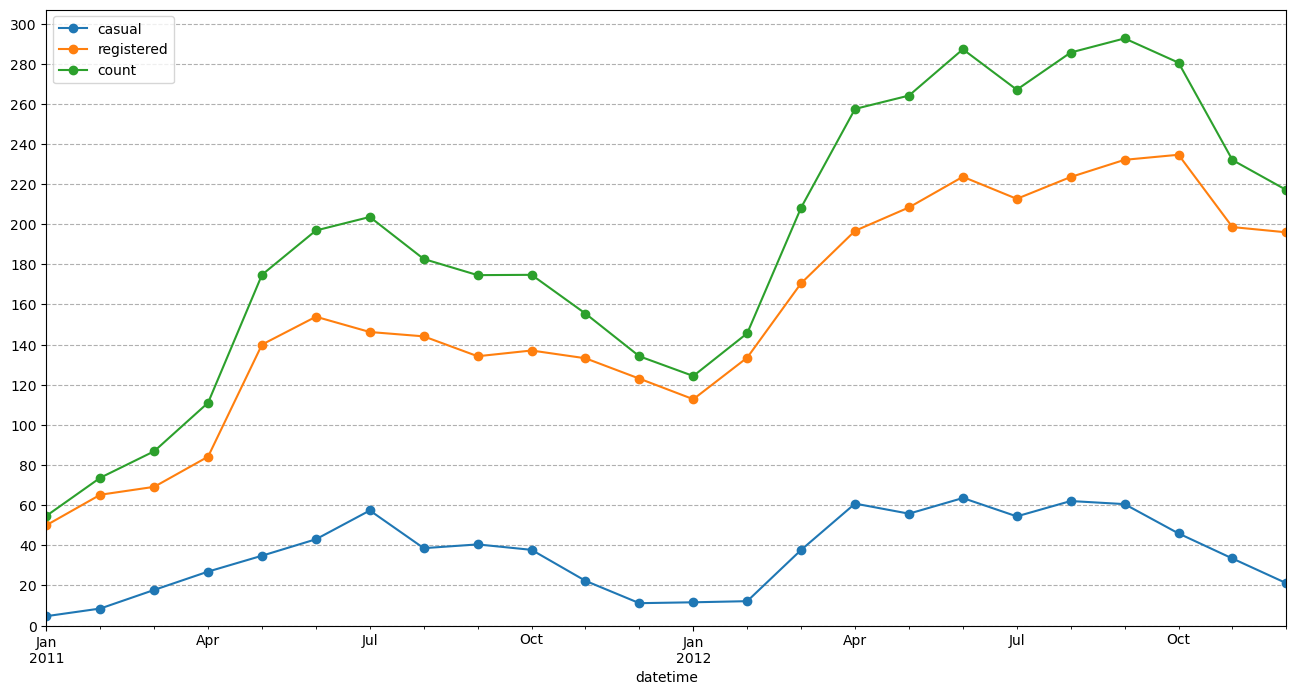

In [66]:
# plotting a lineplot by resampling the data on a monthly basis, and calculating the mean value of 'casual', 'registered' and 'count' users for each month

plt.figure(figsize = (16, 8))

df.resample('M')['casual'].mean().plot(kind = 'line', legend = 'casual', marker = 'o')
df.resample('M')['registered'].mean().plot(kind = 'line', legend = 'registered', marker = 'o')
df.resample('M')['count'].mean().plot(kind = 'line', legend = 'count', marker = 'o')

plt.grid(axis = 'y', linestyle = '--')    
plt.yticks(np.arange(0, 301, 20))
plt.ylim(0,)   
plt.show()     

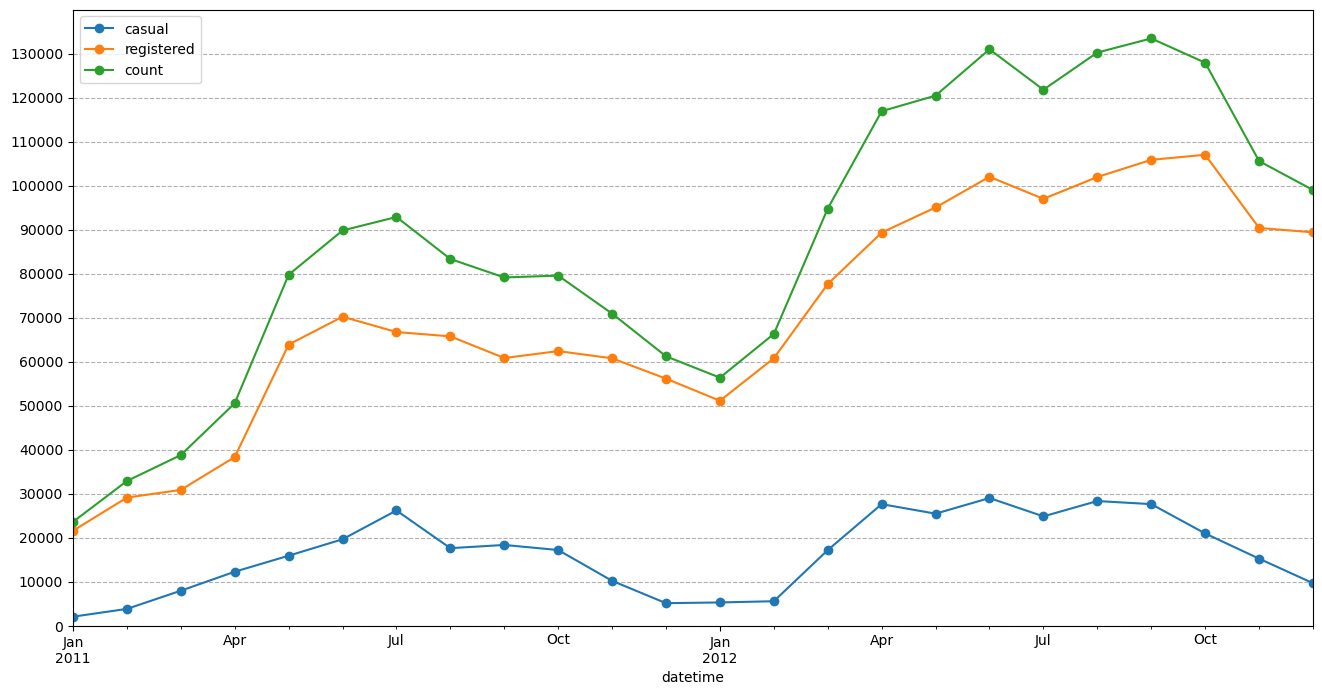

In [67]:
# plotting a lineplot by resampling the data on a monthly basis, and calculating the sum of 'casual', 'registered' and 'count' users for each month

plt.figure(figsize = (16, 8))

df.resample('M')['casual'].sum().plot(kind = 'line', legend = 'casual', marker = 'o')
df.resample('M')['registered'].sum().plot(kind = 'line', legend = 'registered', marker = 'o')
df.resample('M')['count'].sum().plot(kind = 'line', legend = 'count', marker = 'o')

plt.grid(axis = 'y', linestyle = '--')     
plt.yticks(np.arange(0, 130001, 10000))
plt.ylim(0,)       
plt.show()  

- If there is an increase in the average hourly count of rental bikes from the year 2011 to 2012?

In [68]:
df1 = df.resample('Y')['count'].mean().to_frame().reset_index()

df1['prev_count'] = df1['count'].shift(1) 

# Calculating the growth percentage of 'count' with respect to the 'count' of previous year
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1

,datetime,count,prev_count,growth_percent
0,2011-12-31,144.223349,NaN,NaN
1,2012-12-31,238.560944,144.223349,65.410764


- This data suggests that there was substantial growth in the count of the variable over the course of one year.
- The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.

In [69]:
df.reset_index(inplace = True)

- <b> How does the average hourly count of rental bikes varies for different month? </b>

In [70]:
df1 = df.groupby(by = df['datetime'].dt.month)['count'].mean().reset_index()
df1.rename(columns = {'datetime' : 'month'}, inplace = True)

df1['prev_count'] = df1['count'].shift(1) 

# Calculating the growth percentage of 'count' with respect to the 'count' of previous month
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1.set_index('month', inplace = True)
df1

,count,prev_count,growth_percent
month,,,
1,90.366516,NaN,NaN
2,110.003330,90.366516,21.730188
3,148.169811,110.003330,34.695751
4,184.160616,148.169811,24.290241
5,219.459430,184.160616,19.167406
6,242.031798,219.459430,10.285440
7,235.325658,242.031798,-2.770768
8,234.118421,235.325658,-0.513007
9,233.805281,234.118421,-0.133753


- The count of rental bikes shows an increasing trend from January to March, with a significant growth rate of 34.70% between February and March.
- The growth rate starts to stabilize from April to June, with a relatively smaller growth rate.
- From July to September, there is a slight decrease in the count of rental bikes, with negative growth rates.
- The count further declines from October to December, with the largest drop observed between October and November (-14.94%).

[]

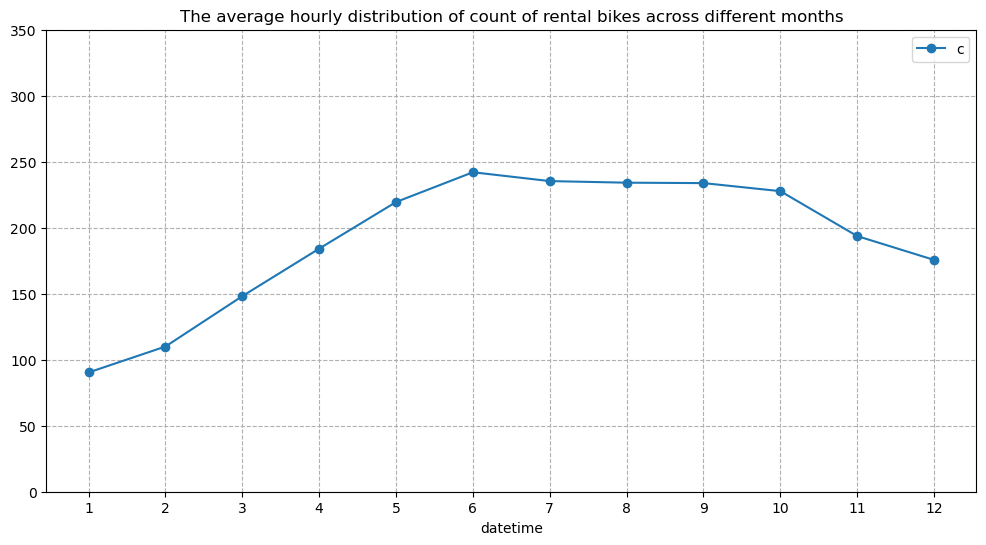

In [71]:
# The resulting plot visualizes the average hourly distribution of the count of rental bikes for each month, allowing for comparison and identification of any patterns or trends throughout the year.
    
plt.figure(figsize = (12, 6))

plt.title("The average hourly distribution of count of rental bikes across different months")

df.groupby(by = df['datetime'].dt.month)['count'].mean().plot(kind = 'line', marker = 'o')

plt.ylim(0,)    
plt.xticks(np.arange(1, 13))  
plt.legend('count') 
plt.yticks(np.arange(0, 400, 50))

plt.grid(axis = 'both', linestyle = '--')
plt.plot()     

- The average hourly count of rental bikes is the highest in the month of June followed by July and August.
- The average hourly count of rental bikes is the lowest in the month of January followed by February and March.

<I> Overall, these trends suggest a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months. It could be useful for the rental bike company to consider these patterns for resource allocation, marketing strategies, and operational planning throughout the year. </I>

- <b> What is the distribution of average count of rental bikes on an hourly basis in a single day? </b>

In [72]:
df1 = df.groupby(by = df['datetime'].dt.hour)['count'].mean().reset_index()
df1.rename(columns = {'datetime' : 'hour'}, inplace = True)

df1['prev_count'] = df1['count'].shift(1) 

# Calculating the growth percentage of 'count' with respect to the 'count' of previous hour
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1.set_index('hour', inplace = True)
df1

,count,prev_count,growth_percent
hour,,,
0,55.138462,NaN,NaN
1,33.859031,55.138462,-38.592718
2,22.899554,33.859031,-32.367959
3,11.757506,22.899554,-48.656179
4,6.407240,11.757506,-45.505110
5,19.767699,6.407240,208.521293
6,76.259341,19.767699,285.777526
7,213.116484,76.259341,179.462793
8,362.769231,213.116484,70.221104


- During the early morning hours (hours 0 to 5), there is a significant decrease in the count, with negative growth percentages ranging from -38.59% to -48.66%.
- However, starting from hour 5, there is a sudden increase in count, with a sharp positive growth percentage of 208.52% observed from hour 4 to hour 5.
- The count continues to rise significantly until reaching its peak at hour 17, with a growth percentage of 48.17% compared to the previous hour.
- After hour 17, there is a gradual decrease in count, with negative growth percentages ranging from -8.08% to -32.99% during the late evening and nighttime hours.

[]

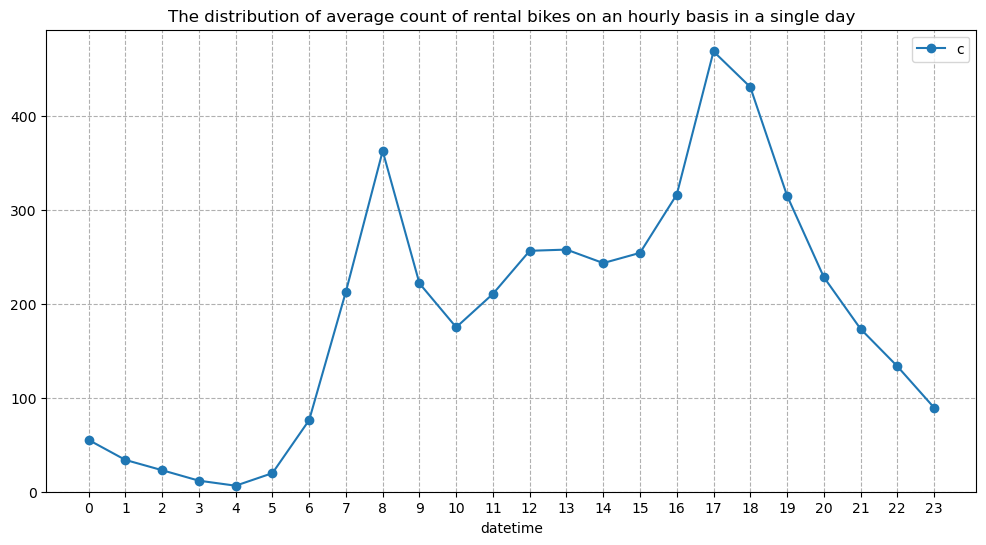

In [73]:
plt.figure(figsize = (12, 6))
plt.title("The distribution of average count of rental bikes on an hourly basis in a single day")
df.groupby(by = df['datetime'].dt.hour)['count'].mean().plot(kind = 'line', marker = 'o')
plt.ylim(0,)
plt.xticks(np.arange(0, 24))
plt.legend('count')
plt.grid(axis = 'both', linestyle = '--')
plt.plot()

- The average count of rental bikes is the highest at 5 PM followed by 6 PM and 8 AM of the day.
- The average count of rental bikes is the lowest at 4 AM followed by 3 AM and 5 AM of the day.

<I> These patterns indicate that there is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.</I>

<b> Basic Information about the Dataset </b>

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  day         10886 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 1.1+ MB


- The dataframe requires a memory usage of about 1.1+ MB.

Though the memory usage is small but can we still decrease the memory usage?

In [75]:
# 1: spring, 2: summer, 3: fall, 4: winter
def season_category(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'
df['season'] = df['season'].apply(season_category)

# Optimizing Memory Usage of the Dataframe

- Updating dtype of season column

In [76]:
print('Memory usage of season column : ', df['season'].memory_usage()) 

df['season'] = df['season'].astype('category')
print('Updated Memory usage of season column : ', df['season'].memory_usage())

Memory usage of season column :  87220
Updated Memory usage of season column :  11222


- Updating dtype of holiday column

In [77]:
print('Max value entry in holiday column : ', df['holiday'].max())         
print('Memory usage of holiday column : ', df['holiday'].memory_usage()) 

df['holiday'] = df['holiday'].astype('category')
print('Updated Memory usage of holiday column : ', df['holiday'].memory_usage())

Max value entry in holiday column :  1
Memory usage of holiday column :  87220
Updated Memory usage of holiday column :  11142


- Updating dtype of workingday column

In [78]:
print('Max value entry in workingday column : ', df['workingday'].max())         
print('Memory usage of workingday column : ', df['workingday'].memory_usage()) 

df['workingday'] = df['workingday'].astype('category')
print('Updated Memory usage of workingday column : ', df['workingday'].memory_usage())

Max value entry in workingday column :  1
Memory usage of workingday column :  87220
Updated Memory usage of workingday column :  11142


- Updating dtype of weather column

In [79]:
print('Max value entry in weather column : ', df['weather'].max())         
print('Memory usage of weather column : ', df['weather'].memory_usage()) 

df['weather'] = df['weather'].astype('category')
print('Updated Memory usage of weather column : ', df['weather'].memory_usage())

Max value entry in weather column :  4
Memory usage of weather column :  87220
Updated Memory usage of weather column :  11222


- Updating dtype of temp column

In [80]:
print('Max value entry in temp column : ', df['temp'].max())         
print('Memory usage of temp column : ', df['temp'].memory_usage()) 

df['temp'] = df['temp'].astype('float32')
print('Updated Memory usage of temp column : ', df['temp'].memory_usage())

Max value entry in temp column :  41.0
Memory usage of temp column :  87220
Updated Memory usage of temp column :  43676


- Updating dtype of atemp column

In [81]:
print('Max value entry in atemp column : ', df['atemp'].max())         
print('Memory usage of atemp column : ', df['atemp'].memory_usage()) 

df['atemp'] = df['atemp'].astype('float32')
print('Updated Memory usage of atemp column : ', df['atemp'].memory_usage())

Max value entry in atemp column :  45.455
Memory usage of atemp column :  87220
Updated Memory usage of atemp column :  43676


- Updating dtype of humidity column

In [82]:
print('Max value entry in humidity column : ', df['humidity'].max())         
print('Memory usage of humidity column : ', df['temp'].memory_usage()) 

df['humidity'] = df['humidity'].astype('int8')
print('Updated Memory usage of humidity column : ', df['humidity'].memory_usage())

Max value entry in humidity column :  100
Memory usage of humidity column :  43676
Updated Memory usage of humidity column :  11018


- Updating dtype of windspeed column

In [83]:
print('Max value entry in windspeed column : ', df['windspeed'].max())         
print('Memory usage of windspeed column : ', df['windspeed'].memory_usage()) 

df['windspeed'] = df['windspeed'].astype('float32')
print('Updated Memory usage of windspeed column : ', df['windspeed'].memory_usage())

Max value entry in windspeed column :  56.9969
Memory usage of windspeed column :  87220
Updated Memory usage of windspeed column :  43676


- Updating dtype of casual column

In [84]:
print('Max value entry in casual column : ', df['casual'].max())         
print('Memory usage of casual column : ', df['casual'].memory_usage()) 

df['casual'] = df['casual'].astype('int16')
print('Updated Memory usage of casual column : ', df['casual'].memory_usage())

Max value entry in casual column :  367
Memory usage of casual column :  87220
Updated Memory usage of casual column :  21904


- Updating dtype of registered column

In [85]:
print('Max value entry in registered column : ', df['registered'].max())         
print('Memory usage of registered column : ', df['registered'].memory_usage()) 

df['registered'] = df['registered'].astype('int16')
print('Updated Memory usage of registered column : ', df['registered'].memory_usage())

Max value entry in registered column :  886
Memory usage of registered column :  87220
Updated Memory usage of registered column :  21904


- Updating dtype of count column

In [86]:
print('Max value entry in count column : ', df['count'].max())         
print('Memory usage of count column : ', df['count'].memory_usage()) 

df['count'] = df['count'].astype('int16')
print('Updated Memory usage of count column : ', df['count'].memory_usage())

Max value entry in count column :  977
Memory usage of count column :  87220
Updated Memory usage of count column :  21904


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float32       
 6   atemp       10886 non-null  float32       
 7   humidity    10886 non-null  int8          
 8   windspeed   10886 non-null  float32       
 9   casual      10886 non-null  int16         
 10  registered  10886 non-null  int16         
 11  count       10886 non-null  int16         
 12  day         10886 non-null  object        
dtypes: category(4), datetime64[ns](1), float32(3), int16(3), int8(1), object(1)
memory usage: 415.4+ KB


Earlier the dataset was using 1.1+ MB of memory but now it has been reduced to 415.2+ KB. Around 63.17 % reduction in the memory usage.

<b> Basic Description of the dataset </b>

In [88]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.230862,23.655085,61.886460,12.799396,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.940000,16.665001,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.240000,31.059999,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.000000,45.455002,100.000000,56.996899,367.000000,886.000000,977.000000
std,NaN,7.791600,8.474654,19.245033,8.164592,49.960477,151.039033,181.144454


- These statistics provide insights into the central tendency, spread, and range of the numerical features in the dataset.

In [89]:
np.round(df['season'].value_counts(normalize = True) * 100, 2)

season
winter    25.11
fall      25.11
summer    25.11
spring    24.67
Name: proportion, dtype: float64

In [90]:
np.round(df['holiday'].value_counts(normalize = True) * 100, 2)

holiday
0    97.14
1     2.86
Name: proportion, dtype: float64

In [91]:
np.round(df['workingday'].value_counts(normalize = True) * 100, 2)

workingday
1    68.09
0    31.91
Name: proportion, dtype: float64

In [92]:
np.round(df['weather'].value_counts(normalize = True) * 100, 2)

weather
1    66.07
2    26.03
3     7.89
4     0.01
Name: proportion, dtype: float64

# Univariate Analysis

[]

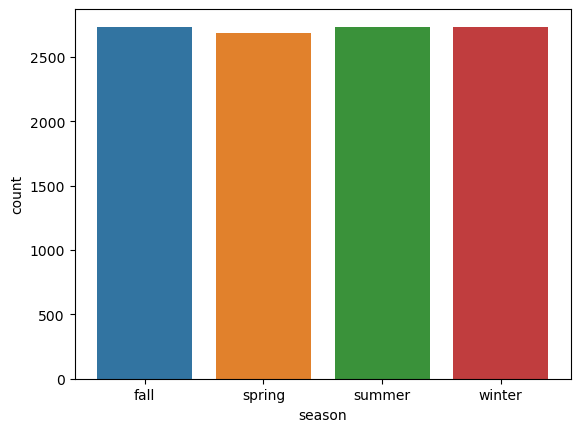

In [97]:
# The below code generates a visually appealing count plot to showcase the distribution of season in the dataset
sns.countplot(data = df, x = 'season')
plt.plot()   

[]

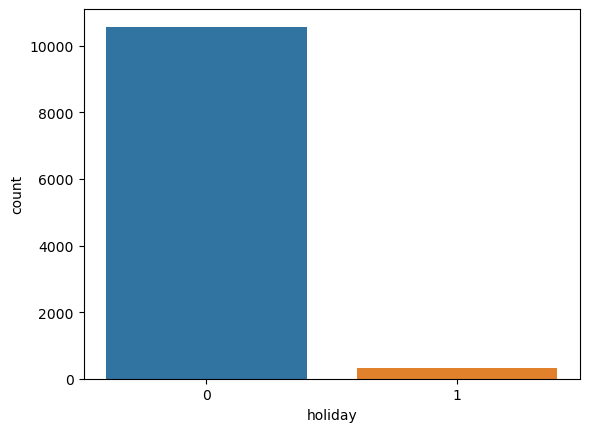

In [98]:
# The below code generates a visually appealing count plot to showcase the distribution of holiday in the dataset
    
sns.countplot(data = df, x = 'holiday')
plt.plot() 

[]

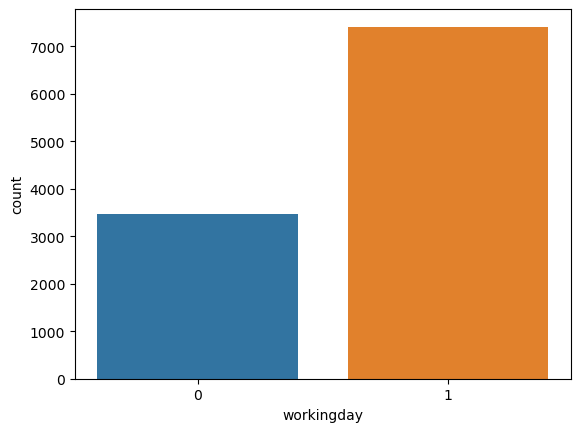

In [99]:
# The below code generates a visually appealing count plot to showcase the distribution of workingday in the dataset

sns.countplot(data = df, x = 'workingday')
plt.plot()

[]

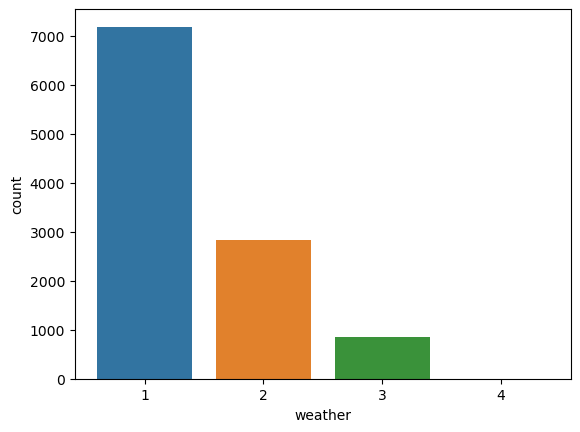

In [100]:
# The below code generates a visually appealing count plot to showcase the distribution of weather in the dataset

sns.countplot(data = df, x = 'weather')
plt.plot() 

[]

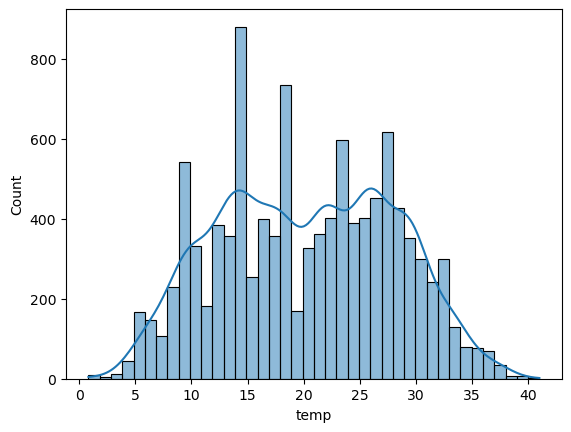

In [101]:
# The below code generates a histogram plot for the 'temp' feature, showing the distribution of temperature values in the dataset. 

sns.histplot(data = df, x = 'temp', kde = True, bins = 40)
plt.plot()  

In [102]:
temp_mean = np.round(df['temp'].mean(), 2)
temp_std = np.round(df['temp'].std(), 2)
temp_mean, temp_std 

(20.23, 7.79)

- The mean and the standard deviation of the temp column is 20.23 and 7.79 degree celcius respectively.

[]

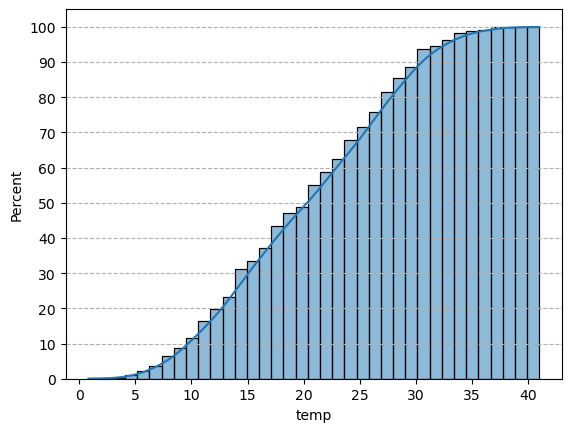

In [103]:
# The below code generates a histogram plot for the 'temp' feature, showing the cumulative distribution of temperature values in the dataset. 

sns.histplot(data = df, x = 'temp', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot() 

- More than 80 % of the time, the temperature is less than 28 degrees celcius.

[]

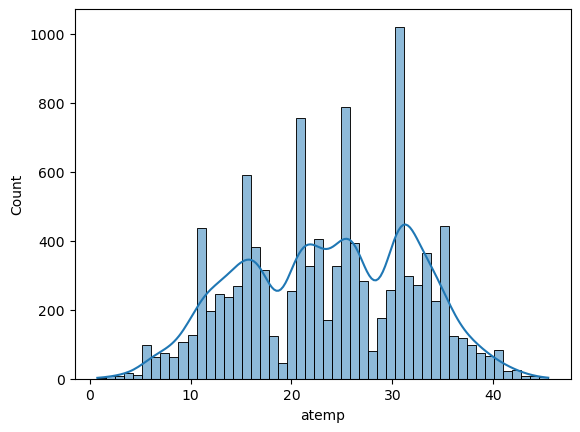

In [104]:
# The below code generates a histogram plot for the 'atemp' feature, showing the distribution of feeling temperature values in the dataset. 

sns.histplot(data = df, x = 'atemp', kde = True, bins = 50)
plt.plot()    

In [105]:
temp_mean = np.round(df['atemp'].mean(), 2)
temp_std = np.round(df['atemp'].std(), 2)
temp_mean, temp_std 

(23.66, 8.47)

- The mean and the standard deviation of the atemp column is 23.66 and 8.47 degree celcius respectively.

[]

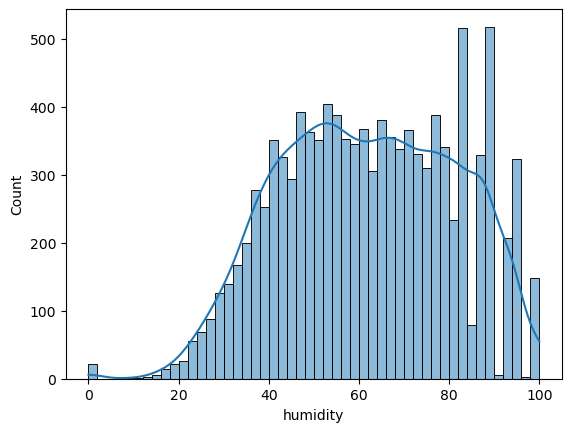

In [106]:
# The below code generates a histogram plot for the 'humidity' feature, showing the distribution of humidity values in the dataset. 

sns.histplot(data = df, x = 'humidity', kde = True, bins = 50)
plt.plot() 

In [107]:
humidity_mean = np.round(df['humidity'].mean(), 2)
humidity_std = np.round(df['humidity'].std(), 2)
humidity_mean, humidity_std 

(61.89, 19.25)

- The mean and the standard deviation of the humidity column is 61.89 and 19.25 respectively.

[]

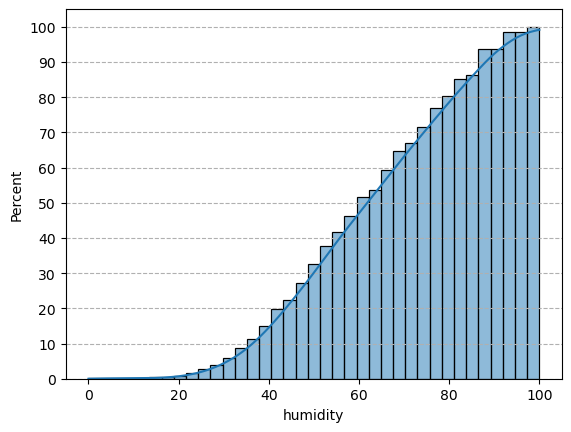

In [108]:
# The below code generates a histogram plot for the 'humidity' feature, showing the cumulative 
    # distribution of humidity values in the dataset. 

sns.histplot(data = df, x = 'humidity', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')    # setting the gridlines along y axis
plt.yticks(np.arange(0, 101, 10))
plt.plot() 

- More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.

[]

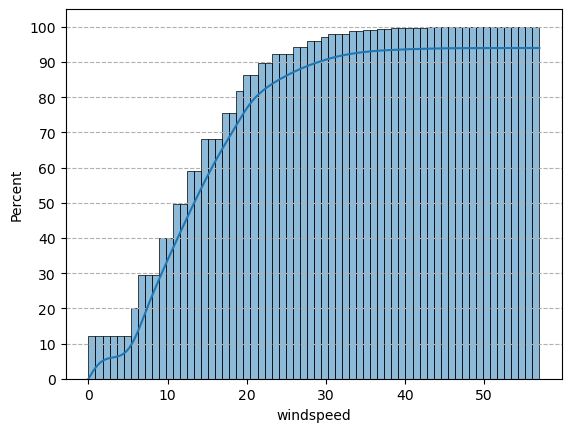

In [109]:
sns.histplot(data = df, x = 'windspeed', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()     

- More than 85 % of the total windspeed data has a value of less than 20.

[]

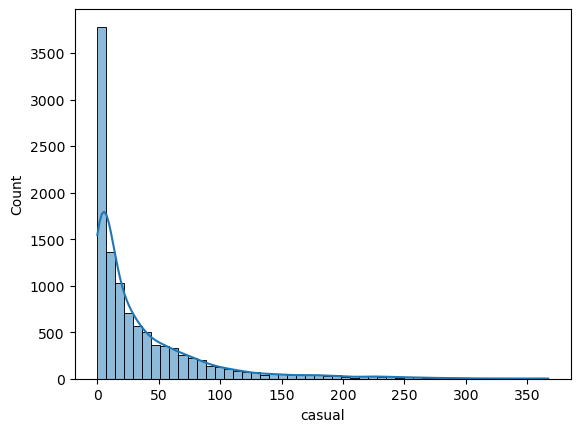

In [110]:
# The below code generates a histogram plot for the 'casual' feature, showing the distribution of casual users' values in the dataset. 

sns.histplot(data = df, x = 'casual', kde = True, bins = 50)
plt.plot() 

[]

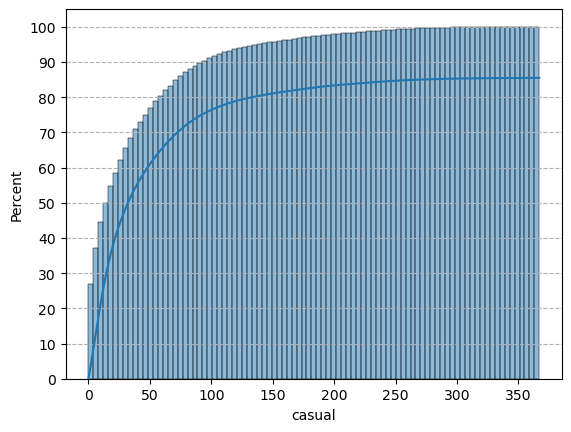

In [111]:
sns.histplot(data = df, x = 'casual', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot() 

- More than 80 % of the time, the count of casual users is less than 60.

[]

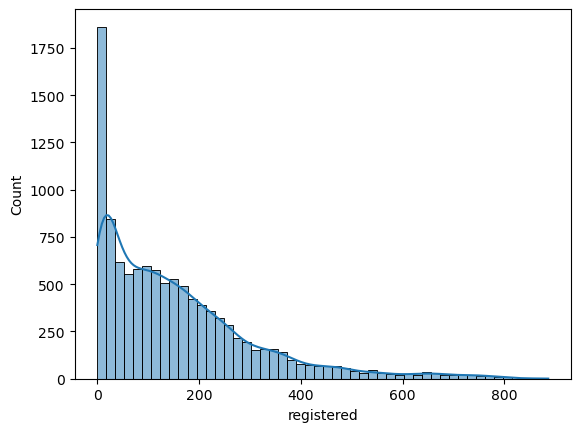

In [112]:
# The below code generates a histogram plot for the 'registered' feature, showing the distribution of registered users' values in the dataset. 

sns.histplot(data = df, x = 'registered', kde = True, bins = 50)
plt.plot()  

[]

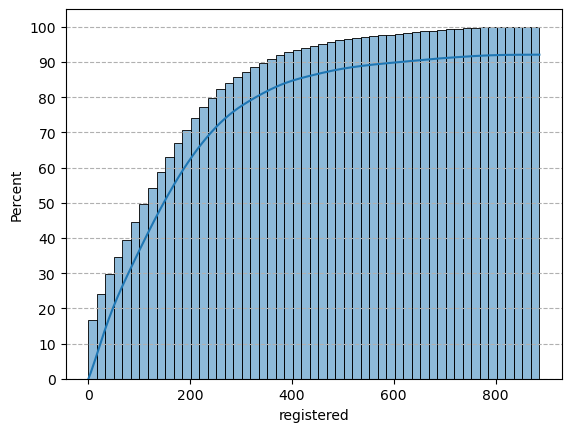

In [113]:
sns.histplot(data = df, x = 'registered', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()

- More than 85 % of the time, the count of registered users is less than 300.

# Outliers Detection

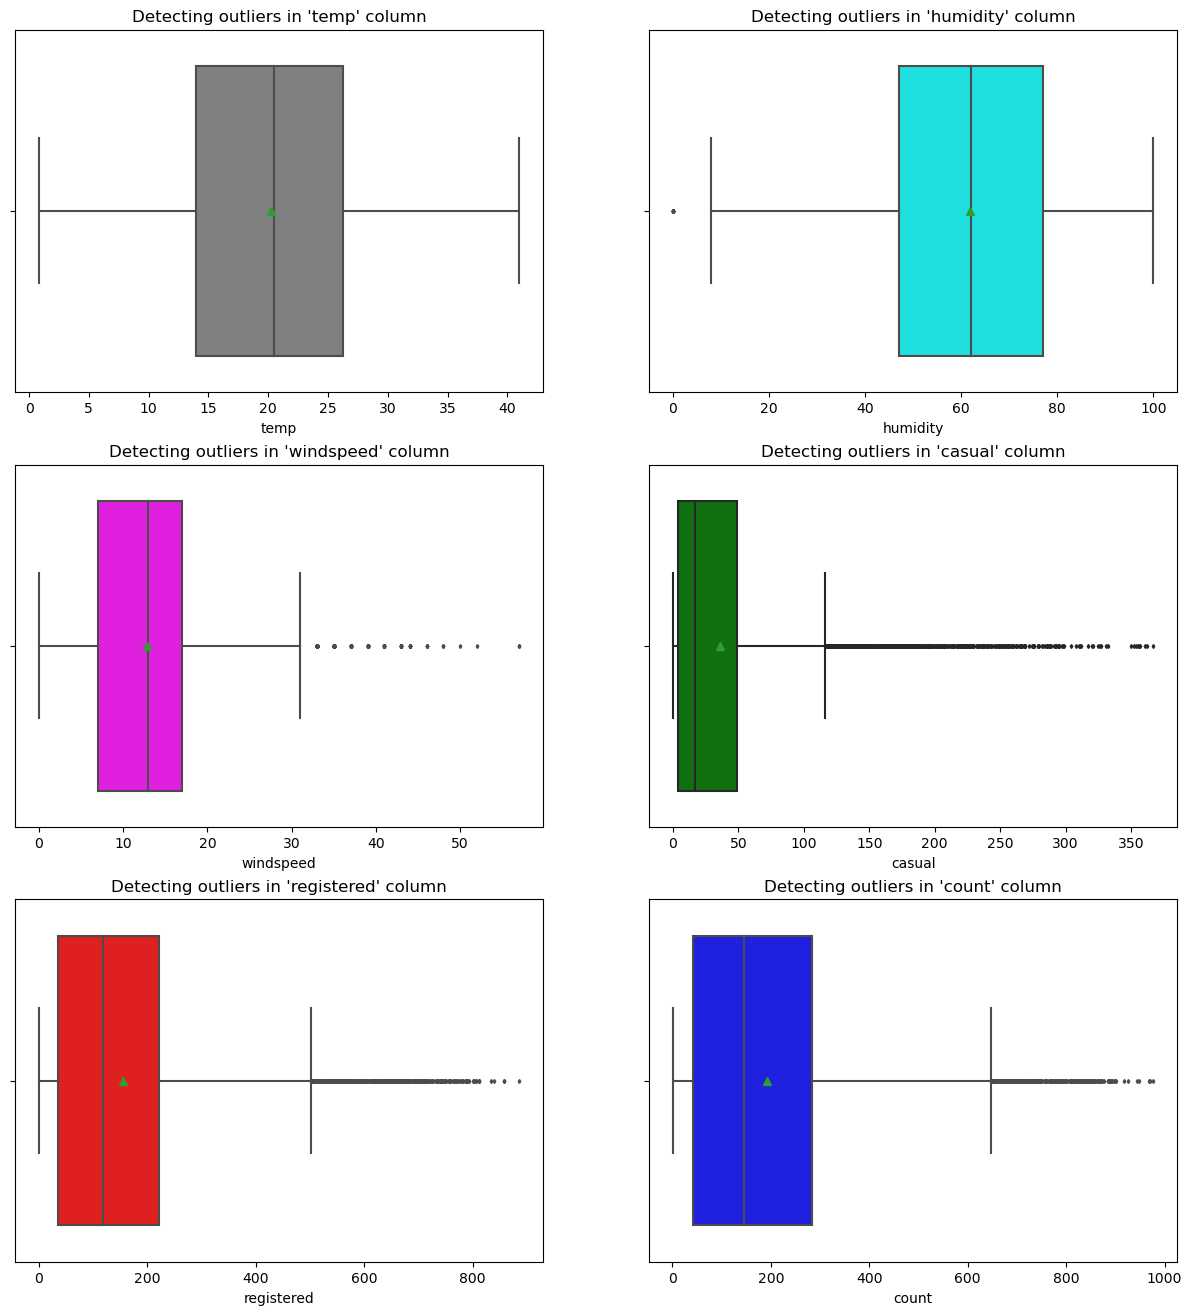

In [114]:
columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
colors = np.random.permutation(['red', 'blue', 'green', 'magenta', 'cyan', 'gray'])
count = 1
plt.figure(figsize = (15, 16))
for i in columns:
    plt.subplot(3, 2, count)
    plt.title(f"Detecting outliers in '{i}' column")
    sns.boxplot(data = df, x = df[i], color = colors[count - 1], showmeans = True, fliersize = 2)
    plt.plot()
    count += 1

- There is no outlier in the temp column.
- There are few outliers present in humidity column.
- There are many outliers present in each of the columns : windspeed, casual, registered, count.

# Bivariate Analysis

[]

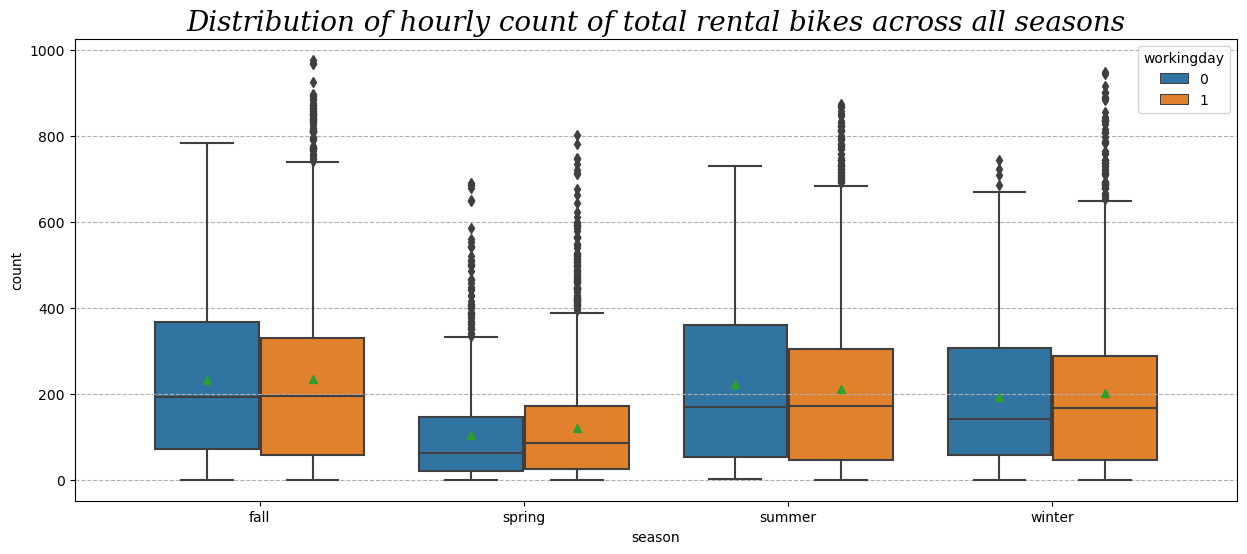

In [115]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all seasons',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = df, x = 'season', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

- The hourly count of total rental bikes is higher in the fall season, followed by the summer and winter seasons. It is generally low in the spring season.

[]

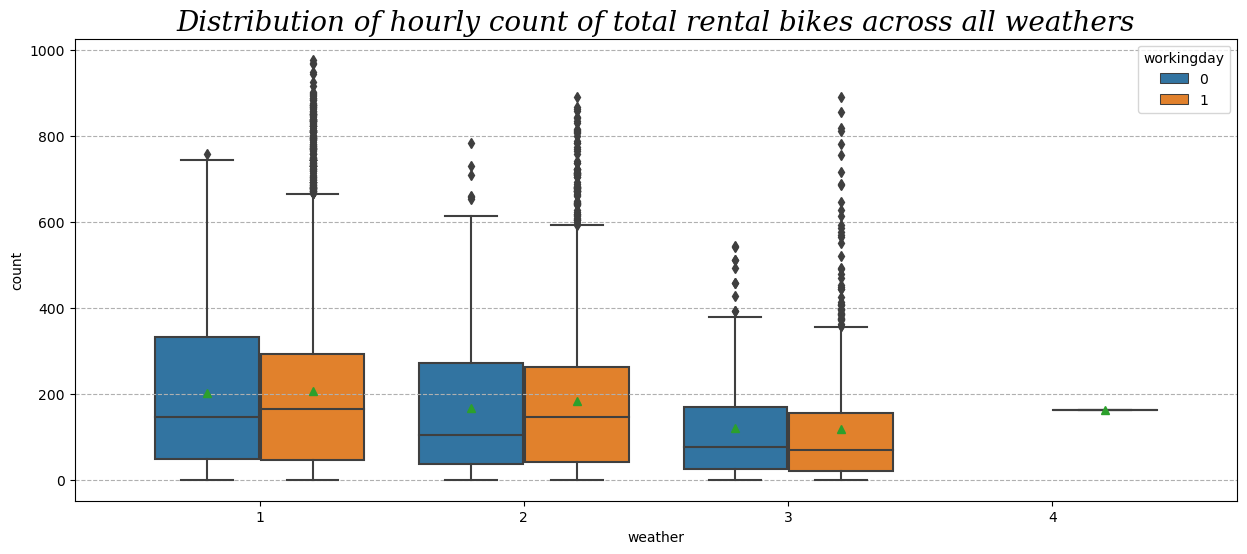

In [116]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all weathers',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = df, x = 'weather', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

- The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

<b> Is there any effect of Working Day on the number of electric cycles rented? </b>

In [117]:
df.groupby(by = 'workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


[]

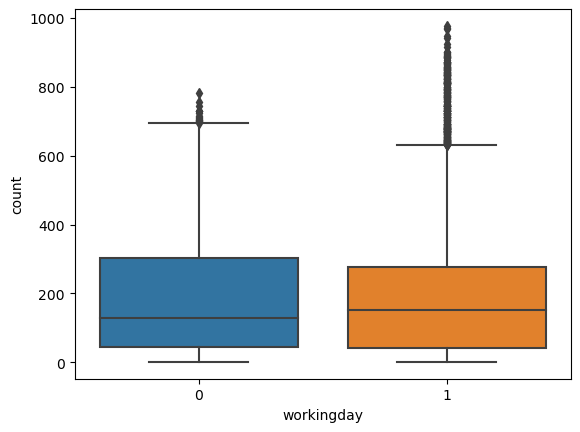

In [118]:
sns.boxplot(data = df, x = 'workingday', y = 'count')
plt.plot()

STEP-1 : Set up Null Hypothesis

- Null Hypothesis ( H0 ) - Working Day does not have any effect on the number of electric cycles rented.

- Alternate Hypothesis ( HA ) - Working Day has some effect on the number of electric cycles rented

STEP-2 : Checking for basic assumpitons for the hypothesis

- Distribution check using QQ Plot
- Homogeneity of Variances using Levene's test

STEP-3: Define Test statistics; Distribution of T under H0.

- If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.

STEP-4: Compute the p-value and fix value of alpha.

- We set our alpha to be 0.05

STEP-5: Compare p-value and alpha.

- Based on p-value, we will accept or reject H0.

1. p-val > alpha : Accept H0
2. p-val < alpha : Reject H0

<b> Visual Tests to know if the samples follow normal distribution </b>

[]

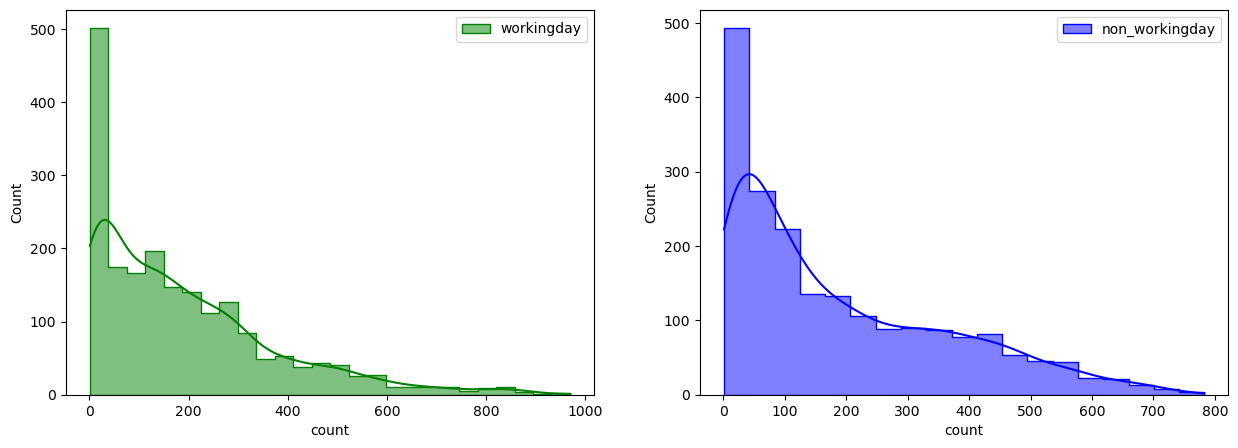

In [119]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['workingday'] == 1, 'count'].sample(2000), 
             element = 'step', color = 'green', kde = True, label = 'workingday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['workingday'] == 0, 'count'].sample(2000), 
             element = 'step', color = 'blue', kde = True, label = 'non_workingday')
plt.legend()
plt.plot()

- It can be inferred from the above plot that the distributions do not follow normal distribution.

<b> Distribution check using QQ Plot </b>

[]

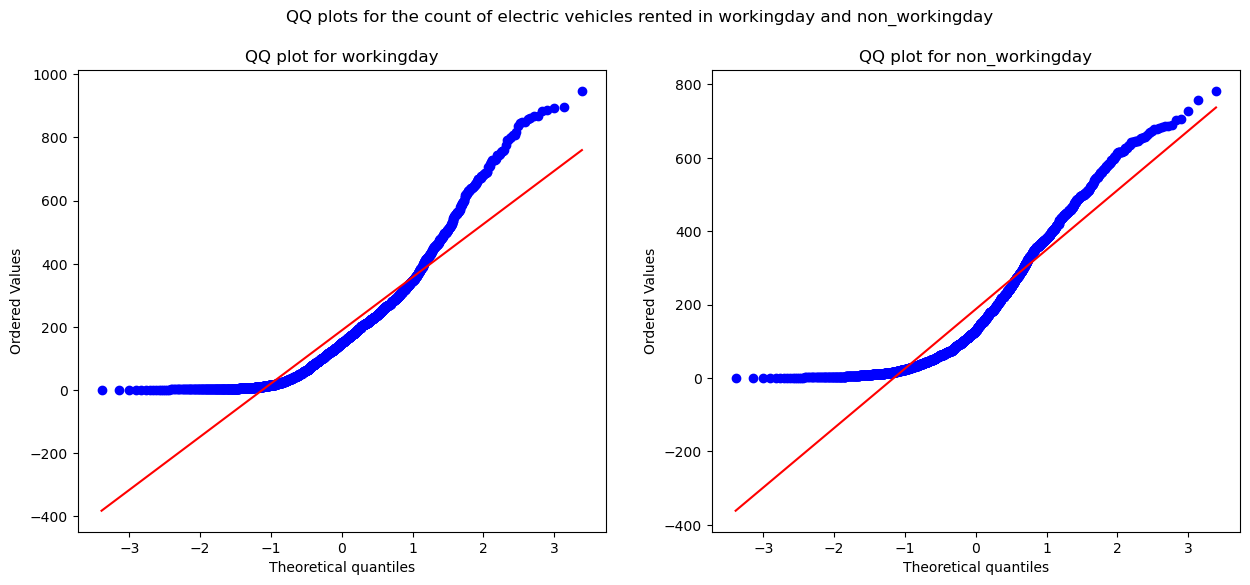

In [121]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in workingday and non_workingday')
spy.probplot(df.loc[df['workingday'] == 1, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for workingday')
plt.subplot(1, 2, 2)
spy.probplot(df.loc[df['workingday'] == 0, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for non_workingday')
plt.plot()

- It can be inferred from the above plot that the distributions do not follow normal distribution.

Applying Shapiro-Wilk test for normality

H0 : The sample follows normal distribution 

H1 : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [123]:
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 1, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 3.738182256146884e-38
The sample does not follow normal distribution


In [124]:
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 5.0598746811131165e-36
The sample does not follow normal distribution


<b> Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution. </b>

In [129]:
transformed_workingday = spy.boxcox(df.loc[df['workingday'] == 1, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_workingday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 1.6136246052607705e-33
The sample does not follow normal distribution


In [130]:
transformed_non_workingday = spy.boxcox(df.loc[df['workingday'] == 1, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_non_workingday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.6136246052607705e-33
The sample does not follow normal distribution


- Even after applying the boxcox transformation on each of the "workingday" and "non_workingday" data, the samples do not follow normal distribution.

- Homogeneity of Variances using Lavene's test

In [131]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(df.loc[df['workingday'] == 1, 'count'].sample(2000),
                                df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 0.8083478023398182
The samples have Homogenous Variance 


Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [132]:
# Ho : Mean no.of electric cycles rented is same for working and non-working days
# Ha : Mean no.of electric cycles rented is not same for working and non-working days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

test_stat, p_value = spy.mannwhitneyu(df.loc[df['workingday'] == 1, 'count'], 
                                      df.loc[df['workingday'] == 0, 'count'])
print('P-value :',p_value)
if p_value < 0.05:
    print('Mean no.of electric cycles rented is not same for working and non-working days')
else:
    print('Mean no.of electric cycles rented is same for working and non-working days')

P-value : 0.9679139953914079
Mean no.of electric cycles rented is same for working and non-working days


Therefore, the mean hourly count of the total rental bikes is statistically same for both working and non- working days .

- <b> Is there any effect of holidays on the number of electric cycles rented? </b>

In [133]:
df.groupby(by = 'holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


[]

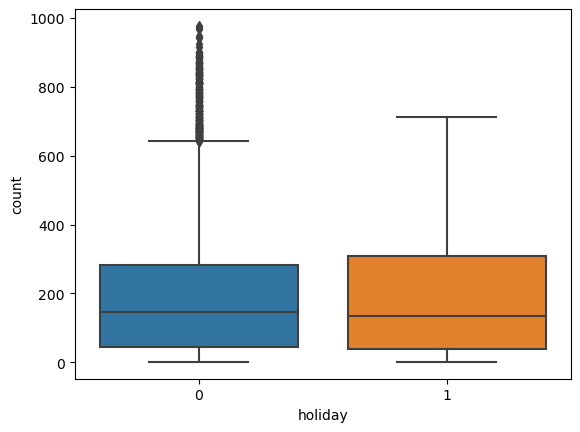

In [134]:
sns.boxplot(data = df, x = 'holiday', y = 'count')
plt.plot()

STEP-1 : Set up Null Hypothesis

 Null Hypothesis ( H0 ) - Holidays have no effect on the number of electric vehicles rented

- Alternate Hypothesis ( HA ) - Holidays has some effect on the number of electric vehicles rented

STEP-2 : Checking for basic assumpitons for the hypothesis

- Distribution check using QQ Plot
- Homogeneity of Variances using Levene's test

STEP-3: Define Test statistics; Distribution of T under H0.

- If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.

STEP-4: Compute the p-value and fix value of alpha.

- We set our alpha to be 0.05

STEP-5: Compare p-value and alpha.

- Based on p-value, we will accept or reject H0.

1. p-val > alpha : Accept H0
2. p-val < alpha : Reject H0

<b> Visual Tests to know if the samples follow normal distribution </b>

[]

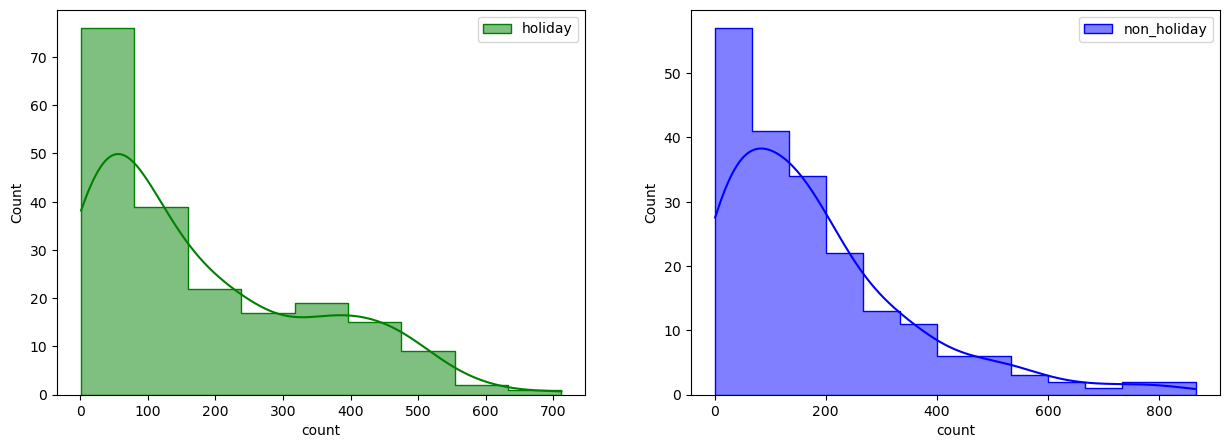

In [135]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['holiday'] == 1, 'count'].sample(200), 
             element = 'step', color = 'green', kde = True, label = 'holiday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['holiday'] == 0, 'count'].sample(200), 
             element = 'step', color = 'blue', kde = True, label = 'non_holiday')
plt.legend()
plt.plot()

- It can be inferred from the above plot that the distributions do not follow normal distribution.

<b> Distribution check using QQ Plot </b>

[]

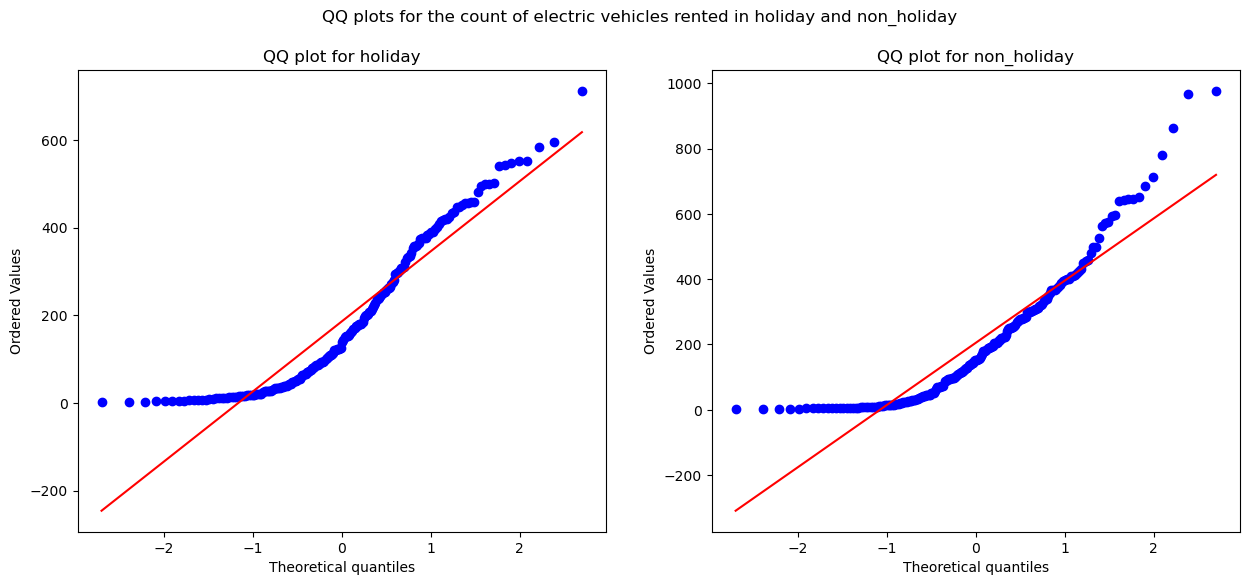

In [136]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in holiday and non_holiday')
spy.probplot(df.loc[df['holiday'] == 1, 'count'].sample(200), plot = plt, dist = 'norm')
plt.title('QQ plot for holiday')
plt.subplot(1, 2, 2)
spy.probplot(df.loc[df['holiday'] == 0, 'count'].sample(200), plot = plt, dist = 'norm')
plt.title('QQ plot for non_holiday')
plt.plot()

- It can be inferred from the above plot that the distributions do not follow normal distribution.
 
It can be seen from the above plots that the samples do not come from normal distribution.

- Applying Shapiro-Wilk test for normality

H0 : The sample follows normal distribution 

H1 : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [137]:
test_stat, p_value = spy.shapiro(df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')   

p-value 4.391484571819593e-12
The sample does not follow normal distribution


In [138]:
test_stat, p_value = spy.shapiro(df.loc[df['holiday'] == 0, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 2.4746593663138583e-10
The sample does not follow normal distribution


<b> Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution. </b>

In [139]:
transformed_holiday = spy.boxcox(df.loc[df['holiday'] == 1, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_holiday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 2.1349180201468698e-07
The sample does not follow normal distribution


In [140]:
transformed_non_holiday = spy.boxcox(df.loc[df['holiday'] == 0, 'count'].sample(5000))[0]
test_stat, p_value = spy.shapiro(transformed_non_holiday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.792416115531362e-27
The sample does not follow normal distribution


- Even after applying the boxcox transformation on each of the "holiday" and "non_holiday" data, the samples do not follow normal distribution.

<b> Homogeneity of Variances using Levene's test </b>

In [141]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(df.loc[df['holiday'] == 0, 'count'].sample(200),
                                df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 0.8707500378729278
The samples have Homogenous Variance 


- Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [142]:
# Ho : No.of electric cycles rented is similar for holidays and non-holidays
# Ha : No.of electric cycles rented is not similar for holidays and non-holidays days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

test_stat, p_value = spy.mannwhitneyu(df.loc[df['holiday'] == 0, 'count'].sample(200),
                                      df.loc[df['holiday'] == 1, 'count'].sample(200))
print('P-value :',p_value)
if p_value < 0.05:
    print('No.of electric cycles rented is not similar for holidays and non-holidays days')
else:
    print('No.of electric cycles rented is similar for holidays and non-holidays')

P-value : 0.6134619782560861
No.of electric cycles rented is similar for holidays and non-holidays


Therefore, the number of electric cycles rented is statistically similar for both holidays and non - holidays.

<b> Is weather dependent on the season? </b>

In [143]:
df[['weather', 'season']].describe()

,weather,season
count,10886,10886
unique,4,4
top,1,winter
freq,7192,2734


- It is clear from the above statistical description that both 'weather' and 'season' features are categorical in nature.

STEP-1 : Set up Null Hypothesis

- Null Hypothesis ( H0 ) - weather is independent of season

- Alternate Hypothesis ( HA ) - weather is dependent of seasons.

STEP-2: Define Test statistics

- Since we have two categorical features, the Chi- square test is applicable here. Under H0, the test statistic should follow Chi-Square Distribution.

STEP-3: Checking for basic assumptons for the hypothesis (Non-Parametric Test)

- The data in the cells should be frequencies, or counts of cases.
- The levels (or categories) of the variables are mutually exclusive. That is, a particular subject fits into one and only one level of each of the variables.
- There are 2 variables, and both are measured as categories.
- The value of the cell expecteds should be 5 or more in at least 80% of the cells, and no cell should have an expected of less than one (3).

STEP-4: Compute the p-value and fix value of alpha.

- we will be computing the chi square-test p-value using the chi2_contingency function using scipy.stats. We set our alpha to be 0.05

STEP-5: Compare p-value and alpha.

- Based on p-value, we will accept or reject H0.

1. p-val > alpha : Accept H0
2. p-val < alpha : Reject H0

The Chi-square statistic is a non-parametric (distribution free) tool designed to analyze group differences when the dependent variable is measured at a nominal level. Like all non-parametric statistics, the Chi-square is robust with respect to the distribution of the data. Specifically, it does not require equality of variances among the study groups or homoscedasticity in the data.

In [144]:
# First, finding the contingency table such that each value is the total number of total bikes rented for a particular season and weather 
cross_table = pd.crosstab(index = df['season'], 
                          columns = df['weather'], 
                          values = df['count'], 
                          aggfunc = np.sum).replace(np.nan, 0)
cross_table

weather,1,2,3,4
season,,,,
fall,470116,139386,31160,0
spring,223009,76406,12919,164
summer,426350,134177,27755,0
winter,356588,157191,30255,0


Since the above contingency table has one column in which the count of the rented electric vehicle is less than 5 in most of the cells, we can remove the weather 4 and then proceed further.

In [145]:
cross_table = pd.crosstab(index = df['season'], 
                          columns = df.loc[df['weather'] != 4, 'weather'], 
                          values = df['count'], 
                          aggfunc = np.sum).to_numpy()[:, :3]
cross_table

array([[470116, 139386,  31160],
       [223009,  76406,  12919],
       [426350, 134177,  27755],
       [356588, 157191,  30255]], dtype=int64)

In [146]:
chi_test_stat, p_value, dof, expected = spy.chi2_contingency(observed = cross_table)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('-' * 65)
print("Expected : '\n'", expected)

Test Statistic = 10838.372332480214
p value = 0.0
-----------------------------------------------------------------
Expected : '
' [[453484.88557396 155812.72247031  31364.39195574]
 [221081.86259035  75961.44434981  15290.69305984]
 [416408.3330293  143073.60199337  28800.06497733]
 [385087.91880639 132312.23118651  26633.8500071 ]]


Comparing p value with significance level

<b> Is the number of cycles rented is similar or different in different weather? </b>

In [148]:
df.groupby(by = 'weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


[]

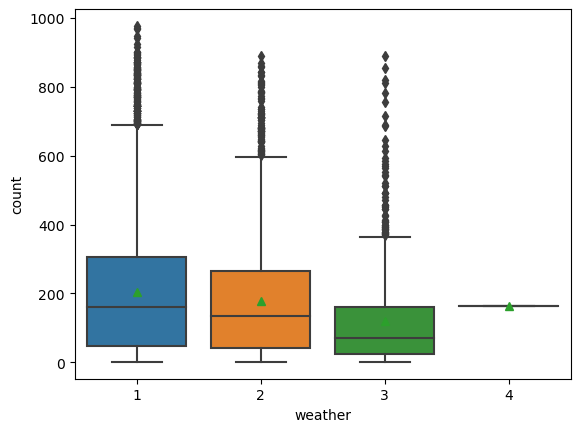

In [149]:
sns.boxplot(data = df, x = 'weather', y = 'count', showmeans = True)
plt.plot()

In [150]:
df_weather1 = df.loc[df['weather'] == 1]
df_weather2 = df.loc[df['weather'] == 2]
df_weather3 = df.loc[df['weather'] == 3]
df_weather4 = df.loc[df['weather'] == 4]
len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)

(7192, 2834, 859, 1)

STEP-1 : Set up Null Hypothesis

- Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for weather 1, 2 and 3. (We wont be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group)

- Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is not same for season 1,2,3 and 4 are different.

STEP-2 : Checking for basic assumpitons for the hypothesis

- Normality check using QQ Plot. If the distribution is not normal, use BOX-COX transform to transform it to normal distribution.

- Homogeneity of Variances using Levene's test

- Each observations are independent.

STEP-3: Define Test statistics

- The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

- F=MSB / MSW

- Under H0, the test statistic should follow F-Distribution.

STEP-4: Decide the kind of test.

- We will be performing right tailed f-test

STEP-5: Compute the p-value and fix value of alpha.

- We will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our alpha to be 0.05

STEP-6: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

- p-val > alpha : Accept H0
- p-val < alpha : Reject H0

<b> Visual Tests to know if the samples follow normal distribution </b>

[]

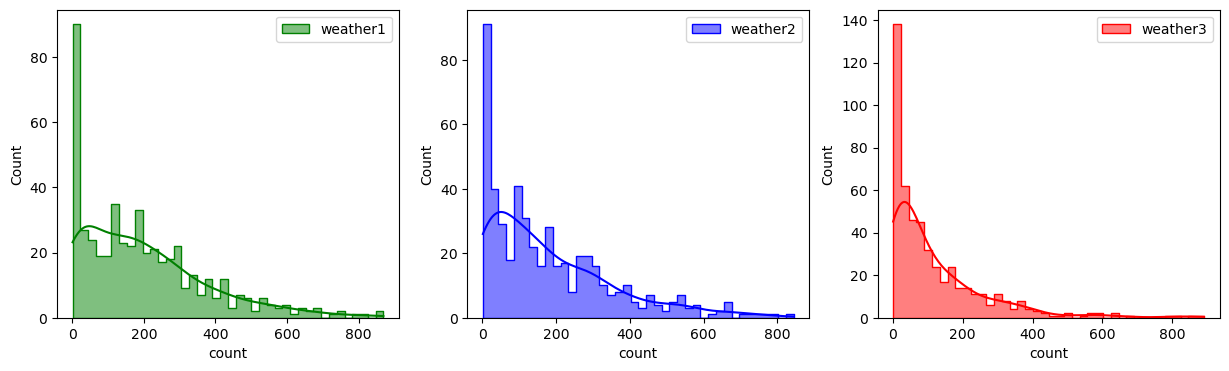

In [152]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_weather1.loc[:, 'count'].sample(500), bins = 40, 
             element = 'step', color = 'green', kde = True, label = 'weather1')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(df_weather2.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'blue', kde = True, label = 'weather2')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(df_weather3.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'red', kde = True, label = 'weather3')
plt.legend()
plt.plot()

It can be inferred from the above plot that the distributions do not follow normal distribution.

<b> Distribution check using QQ Plot </b>

[]

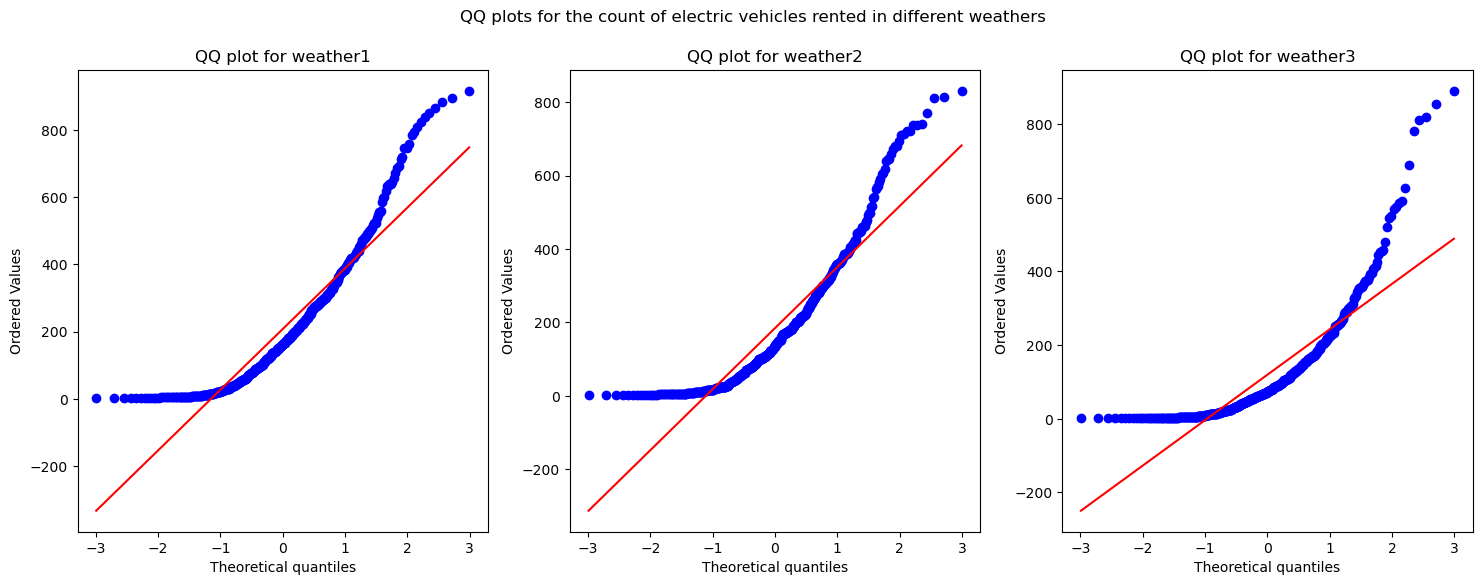

In [153]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different weathers')
spy.probplot(df_weather1.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather1')
plt.subplot(1, 3, 2)
spy.probplot(df_weather2.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather2')
plt.subplot(1, 3, 3)
spy.probplot(df_weather3.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather3')
plt.plot()

- It can be inferred from the above plot that the distributions do not follow normal distribution.

It can be seen from the above plots that the samples do not come from normal distribution.

- Applying Shapiro-Wilk test for normality
 
H0 : The sample follows normal distribution 
H1 : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [155]:
test_stat, p_value = spy.shapiro(df_weather1.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')    

p-value 6.004071735405398e-20
The sample does not follow normal distribution


In [156]:
test_stat, p_value = spy.shapiro(df_weather2.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 5.066380956238022e-19
The sample does not follow normal distribution


In [158]:
test_stat, p_value = spy.shapiro(df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 2.1792470477493023e-26
The sample does not follow normal distribution


<b> Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution. </b>

In [159]:
transformed_weather1 = spy.boxcox(df_weather1.loc[:, 'count'].sample(5000))[0]
test_stat, p_value = spy.shapiro(transformed_weather1)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 1.7487617228731096e-27
The sample does not follow normal distribution


In [160]:
transformed_weather2 = spy.boxcox(df_weather2.loc[:, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_weather2)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 1.9219748327822736e-19
The sample does not follow normal distribution


In [161]:
transformed_weather3 = spy.boxcox(df_weather3.loc[:, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_weather3)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 1.4137293646854232e-06
The sample does not follow normal distribution


- Even after applying the boxcox transformation on each of the weather data, the samples do not follow normal distribution.

<b> Homogeneity of Variances using Levene's test </b>

In [162]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(df_weather1.loc[:, 'count'].sample(500),
                                df_weather2.loc[:, 'count'].sample(500),
                                df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 7.000915080577355e-19
The samples do not have  Homogenous Variance


Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

Comparing p value with significance level

In [188]:
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


Therefore, the average number of rental bikes is statistically different for different weathers.

<b> Is the number of cycles rented is similar or different in different season? </b>

In [164]:
df.groupby(by = 'season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [165]:
df_season_spring = df.loc[df['season'] == 'spring', 'count']
df_season_summer = df.loc[df['season'] == 'summer', 'count']
df_season_fall = df.loc[df['season'] == 'fall', 'count']
df_season_winter = df.loc[df['season'] == 'winter', 'count']
len(df_season_spring), len(df_season_summer), len(df_season_fall), len(df_season_winter)

(2686, 2733, 2733, 2734)

[]

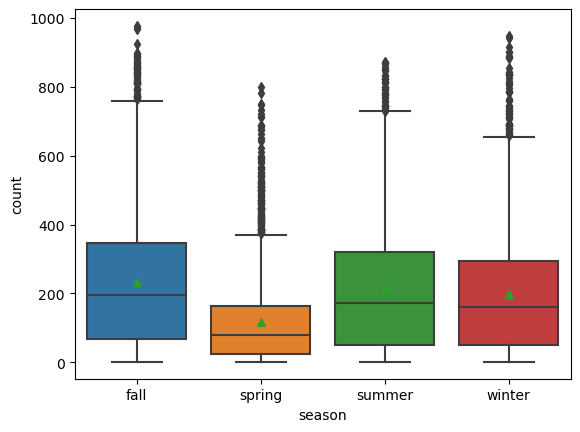

In [166]:
sns.boxplot(data = df, x = 'season', y = 'count', showmeans = True)
plt.plot()

STEP-1 : Set up Null Hypothesis

- Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for season 1,2,3 and 4.

- Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is different for season 1,2,3 and 4.

STEP-2 : Checking for basic assumpitons for the hypothesis

- Normality check using QQ Plot. If the distribution is not normal, use BOX-COX transform to transform it to normal distribution.

- Homogeneity of Variances using Levene's test

- Each observations are independent.

STEP-3: Define Test statistics

- The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

- F=MSB/MSW

- Under H0, the test statistic should follow F-Distribution.

STEP-4: Decide the kind of test.

- We will be performing right tailed f-test

STEP-5: Compute the p-value and fix value of alpha.

- We will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our alpha to be 0.05

STEP-6: Compare p-value and alpha.

- Based on p-value, we will accept or reject H0. p-val > alpha : Accept H0 p-val < alpha : Reject H0

- The one-way ANOVA compares the means between the groups you are interested in and determines whether any of those means are statistically significantly different from each other.

- Specifically, it tests the null hypothesis (H0):

µ1 = µ2 = µ3 = ..... = µk

where, µ = group mean and k = number of groups.

- If, however, the one-way ANOVA returns a statistically significant result, we accept the alternative hypothesis (HA), which is that there are at least two group means that are statistically significantly different from each other.

<b> Visual Tests to know if the samples follow normal distribution </b>

[]

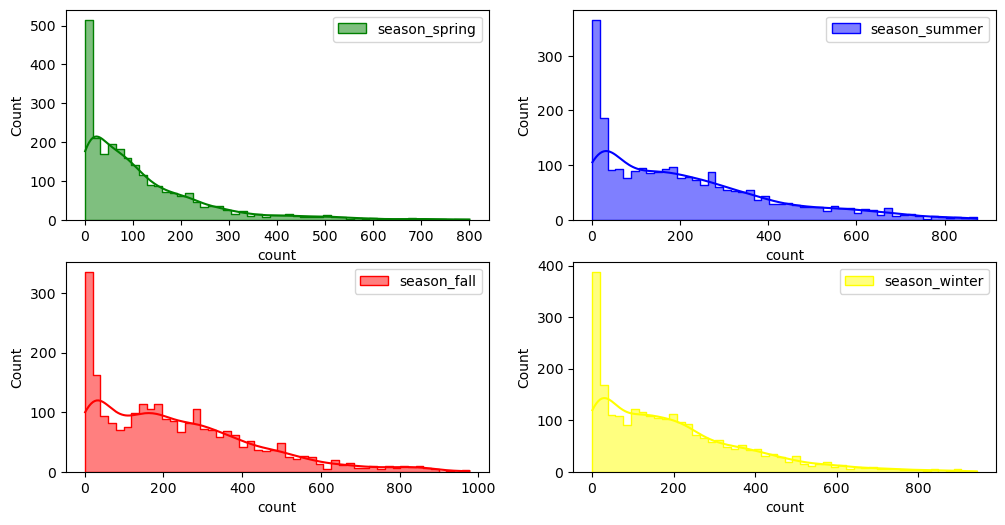

In [167]:
plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df_season_spring.sample(2500), bins = 50, 
             element = 'step', color = 'green', kde = True, label = 'season_spring')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(df_season_summer.sample(2500), bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'season_summer')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(df_season_fall.sample(2500), bins = 50,
             element = 'step', color = 'red', kde = True, label = 'season_fall')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(df_season_winter.sample(2500), bins = 50,
             element = 'step', color = 'yellow', kde = True, label = 'season_winter')
plt.legend()
plt.plot()

- It can be inferred from the above plot that the distributions do not follow normal distribution.

<b> Distribution check using QQ Plot </b>

[]

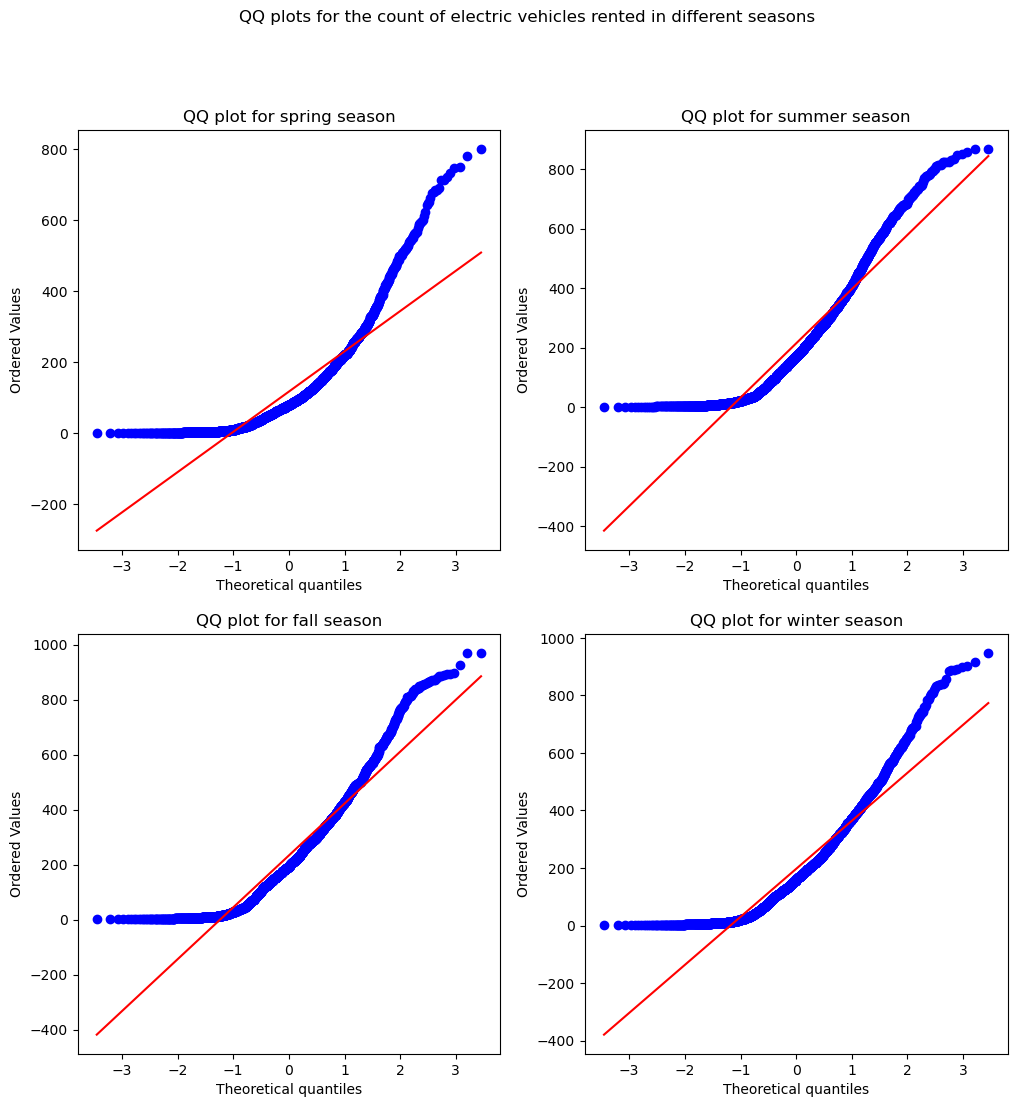

In [168]:
plt.figure(figsize = (12, 12))
plt.subplot(2, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different seasons')
spy.probplot(df_season_spring.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for spring season')

plt.subplot(2, 2, 2)
spy.probplot(df_season_summer.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for summer season')

plt.subplot(2, 2, 3)
spy.probplot(df_season_fall.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for fall season')

plt.subplot(2, 2, 4)
spy.probplot(df_season_winter.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for winter season')
plt.plot()

- It can be inferred from the above plots that the distributions do not follow normal distribution.

It can be seen from the above plots that the samples do not come from normal distribution.

- Applying Shapiro-Wilk test for normality

H0 : The sample follows normal distribution 

H1 : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [169]:
test_stat, p_value = spy.shapiro(df_season_spring.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')    

p-value 0.0
The sample does not follow normal distribution


In [171]:
test_stat, p_value = spy.shapiro(df_season_summer.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 1.2692717103402015e-37
The sample does not follow normal distribution


In [172]:
test_stat, p_value = spy.shapiro(df_season_fall.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 3.463962020654353e-35
The sample does not follow normal distribution


In [174]:
test_stat, p_value = spy.shapiro(df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 2.595020905571042e-38
The sample does not follow normal distribution


<b> Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution. </b>

In [175]:
transformed_df_season_spring = spy.boxcox(df_season_spring.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_spring)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 9.678156103680273e-17
The sample does not follow normal distribution


In [176]:
transformed_df_season_summer = spy.boxcox(df_season_summer.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_summer)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 4.585113834169717e-21
The sample does not follow normal distribution


In [177]:
transformed_df_season_fall = spy.boxcox(df_season_fall.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_fall)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 4.004266234785917e-21
The sample does not follow normal distribution


In [178]:
transformed_df_season_winter = spy.boxcox(df_season_winter.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_winter)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 6.824612284838127e-20
The sample does not follow normal distribution


- Even after applying the boxcox transformation on each of the season data, the samples do not follow normal distribution.

<b> Homogeneity of Variances using Levene's test </b>

In [179]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(df_season_spring.sample(2500),
                                df_season_summer.sample(2500),
                                df_season_fall.sample(2500),
                                df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 6.81125583479334e-112
The samples do not have  Homogenous Variance


Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [180]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = spy.kruskal(df_season_spring, df_season_summer, df_season_fall,df_season_winter)  
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 699.6668548181988
p value = 2.479008372608633e-151


Comparing p value with significance level

In [181]:
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


Therefore, the average number of rental bikes is statistically different for different seasons.

[]

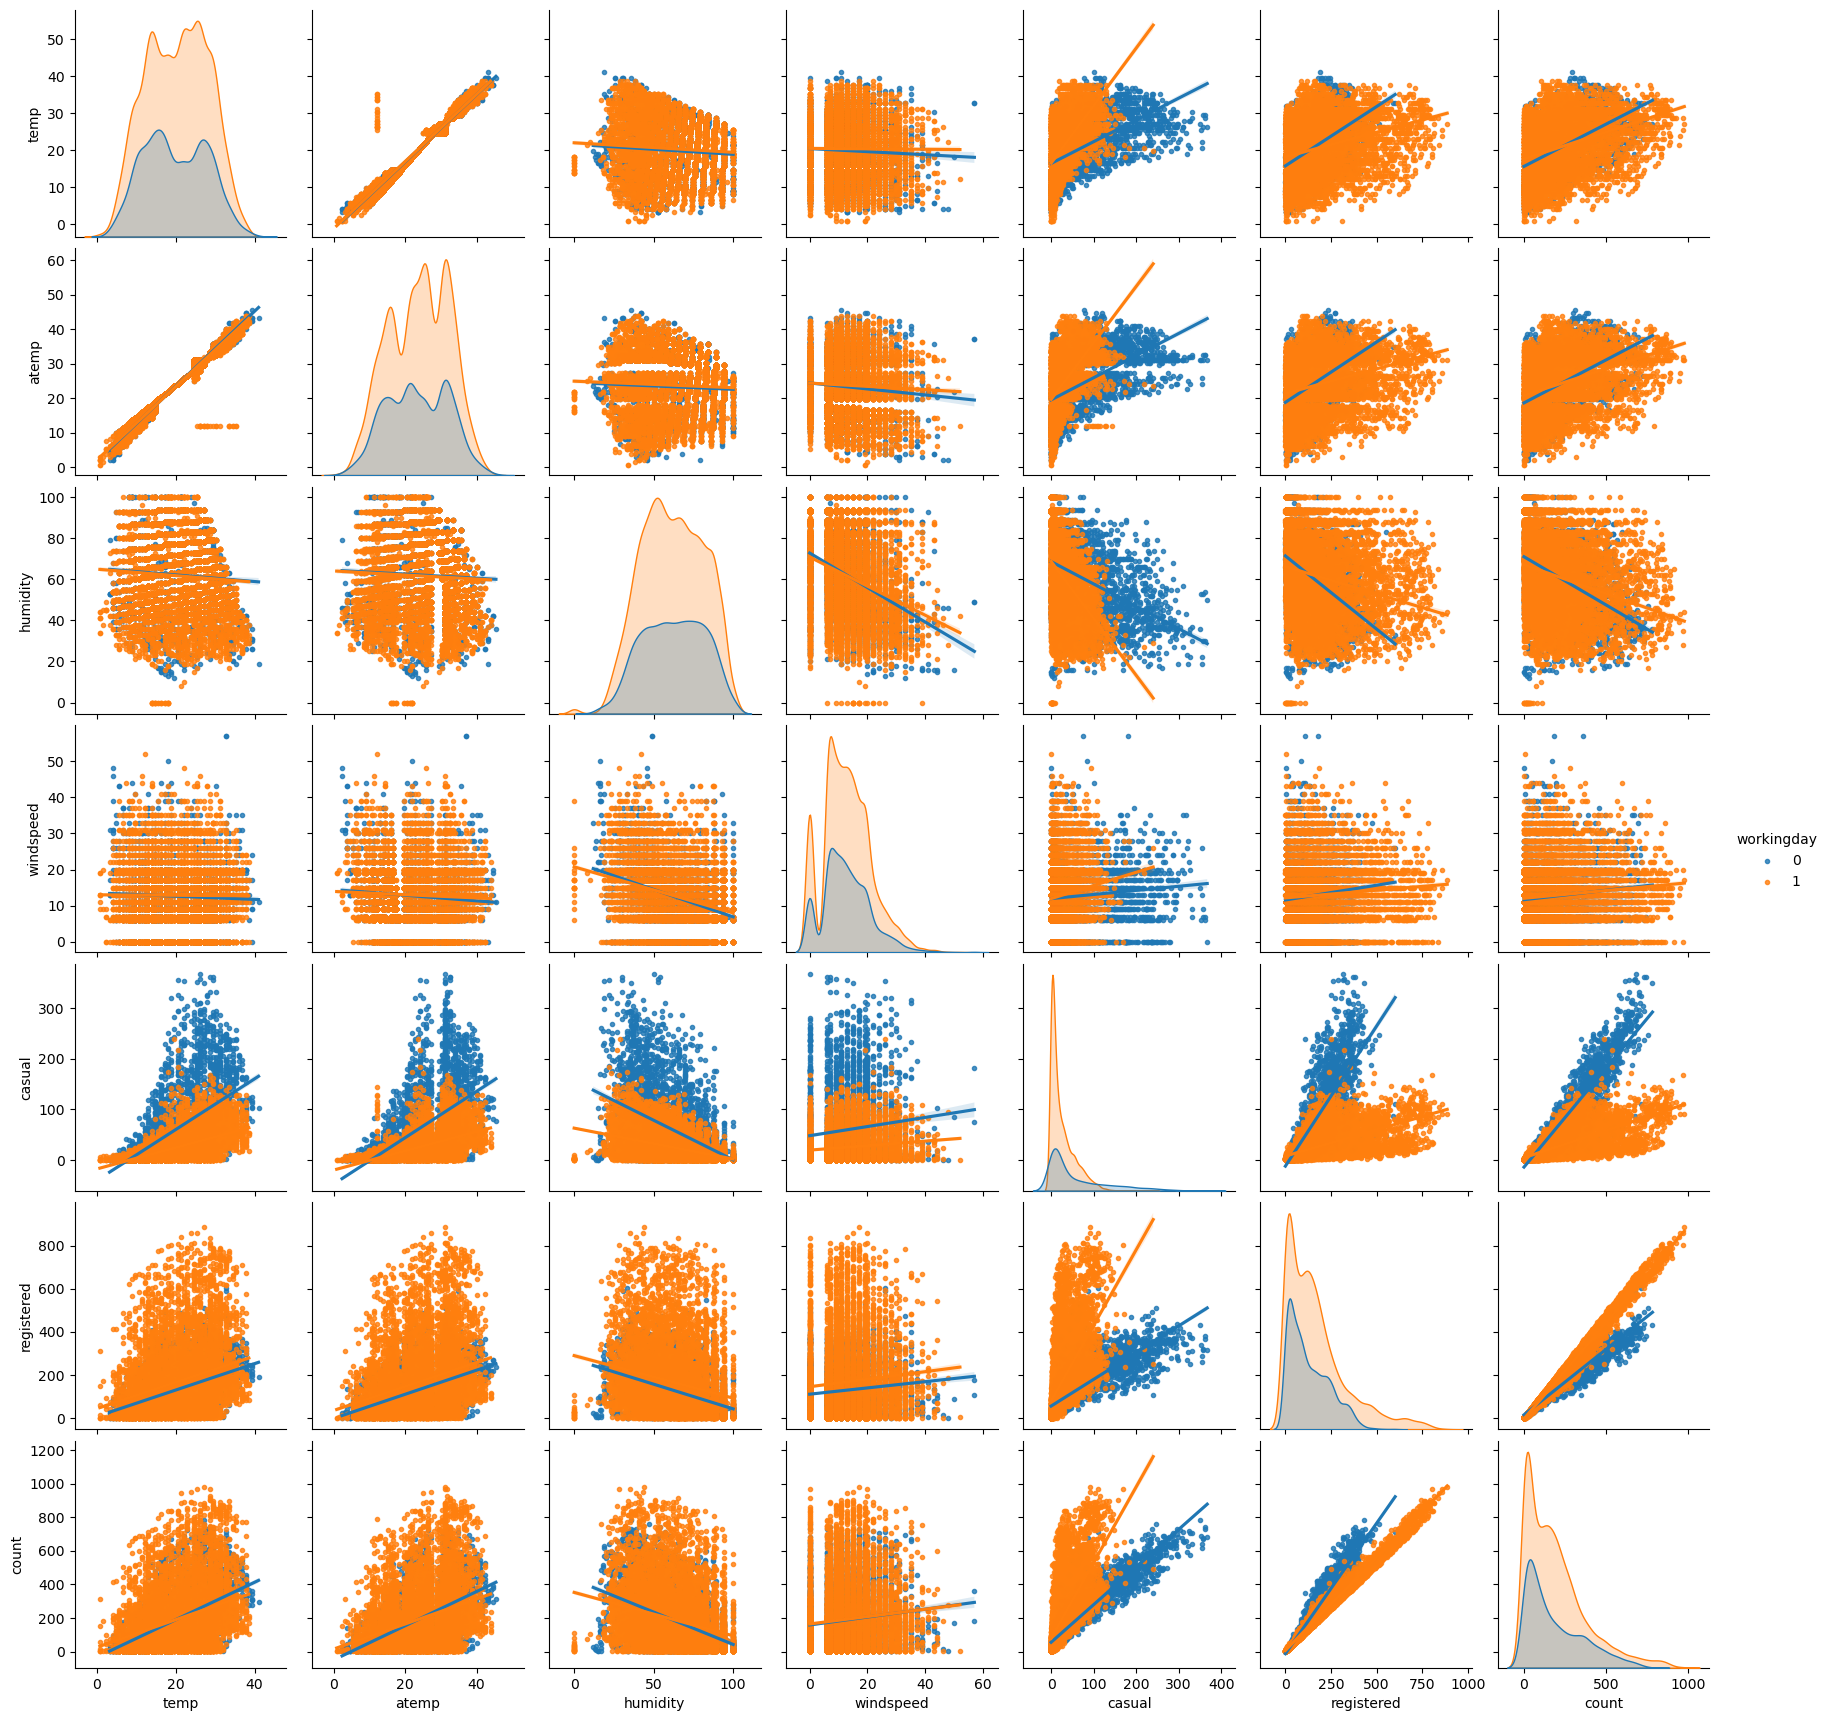

In [182]:
sns.pairplot(data = df, 
             kind = 'reg',
             hue = 'workingday',
             markers = '.')
plt.plot()

In [184]:
corr_data = df.corr(numeric_only=True)
corr_data

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


[]

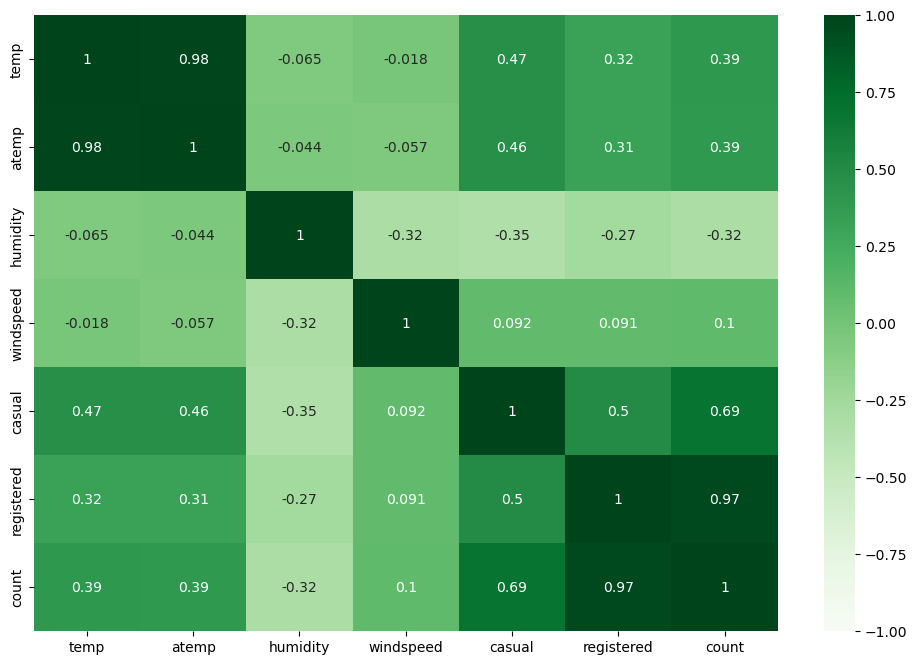

In [185]:
plt.figure(figsize = (12, 8))
sns.heatmap(data = corr_data, cmap = 'Greens', annot = True, vmin = -1, vmax = 1)
plt.plot()

- Very High Correlation (> 0.9) exists between columns [atemp, temp] and [count, registered]
- High positively / negatively correlation (0.7 - 0.9) does not exist between any columns.
- Moderate positive correlation (0.5 - 0.7) exists between columns [casual, count], [casual, registered].
- Low Positive correlation (0.3 - 0.5) exists between columns [count, temp], [count, atemp], [casual, atemp]
- Negligible correlation exists between all other combinations of columns.

# Insights

- The data spans approximately 719 days, covering 2011 and 2012.
- Among every 100 users, roughly 19 are casual while 81 are registered.
- The average hourly count of rental bikes rose from 144 in 2011 to 239 in 2012, showing a growth rate of around 65.41%.
- Demand for rental bikes follows a seasonal trend, peaking in spring and summer, declining in fall, and further decreasing in winter.
- January, February, and March exhibit the lowest average hourly bike counts.
- Throughout the day, bike counts vary, with lows in the early morning, spikes in the morning, peaks in the afternoon, and declines in the evening.
- Temperature remains below 28 degrees Celsius for over 80% of the time.
- Humidity tends to be higher than 40%, ranging from optimal to too moist for over 80% of the time.
- Windspeed is typically less than 20 for over 85% of the time.
- Rental bike counts are highest during clear and cloudy weather, followed by misty conditions, with few records for extreme weather.
- The average hourly bike counts are statistically similar on working and non-working days.
- Weather and season significantly affect hourly bike rentals.
- Different weather conditions result in statistically different hourly bike counts.
- There's no significant statistical relationship between weather types 1, 2, 3, and season concerning hourly bike rentals.
- Hourly bike counts vary significantly across different seasons.

# Recommendations

- <b>Seasonal Marketing:</b> Yulu can promote bike rentals more during spring and summer when demand is high. They can offer deals or packages for these seasons to attract more customers.

- <b>Time-based Pricing:</b> Adjust rental prices based on the time of day. Lower prices during quieter hours and raise them during busy times to encourage rentals at less crowded times.

- <b>Weather-based Promotions:</b> Offer discounts during clear or cloudy weather, when bike rentals are highest. This can attract more customers during favorable conditions.

- <b>User Segmentation:</b> Tailor marketing for registered and casual users differently. Offer loyalty rewards and personalized offers for registered users, and focus on ease of use for casual users.

- <b>Optimize Inventory:</b> Adjust bike numbers based on demand. Have fewer bikes during slow months and more during busy times.

- <b>Improve Weather Data Collection:</b> Gather more data on extreme weather to understand its impact on bike rentals better.

- <b>Customer Comfort:</b> Provide amenities like umbrellas or water bottles to enhance the rental experience.

- <b>Collaborations with Weather Services:</b> Work with weather services to provide real-time updates to customers.

- <b>Seasonal Bike Maintenance:</b> Conduct thorough maintenance before peak seasons to keep bikes in good condition.

- <b>Customer Feedback:</b> Encourage feedback to improve services and meet customer expectations better.

- <b>Social Media Marketing:</b> Use social media to showcase biking experiences and engage with customers.

- <b>Special Occasion Discounts:</b> Offer discounts on environmental awareness days to attract more users.
